# Defensa del trabajo de fin de grado de informática:
### OPTIMIZACIÓN DE QUERIES DE BIG DATA CON SPARK EN AWS

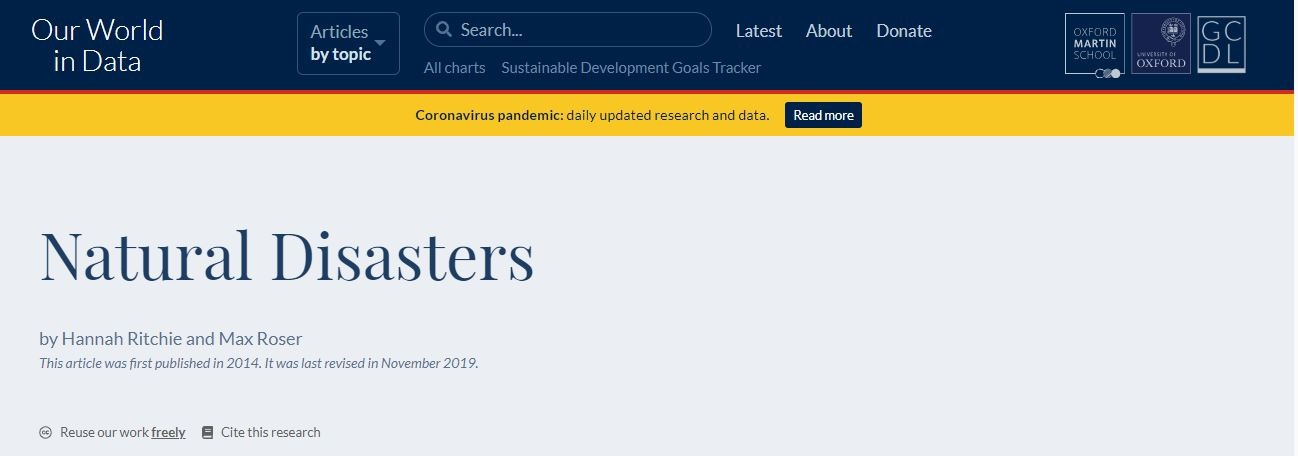

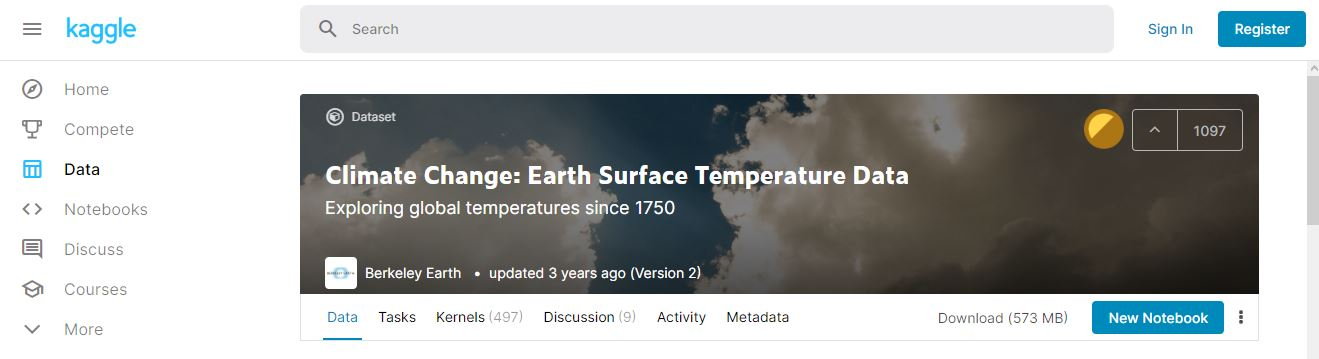

Objetivo general: profundizar en la programación funcional y en el ecosistema de Scala, particularmente Spark, utilizando ejemplos de prueba sacados del dominio de los desastres naturales. En particular:

**1. Realizar queries en Spark SQL y analizar las optimizaciones que ofrece Spark**

**2. Visualización de esas queries utilizando librerías gráficas de Scala**

**3. Pruebas en la nube mediante Databricks, servicio autogestionado de Spark**

**4. Pruebas en la nube mediante AWS**

En primer lugar, importamos las librerías que necesitamos

In [ ]:
import $file.sparksession
import sparksession._
import spark.implicits._
import org.apache.spark._
import org.apache.spark.sql.{functions => func, _}
import org.apache.spark.sql.types._, func._

In [ ]:
def readCsv(input: String ): DataFrame ={
    spark.read.format("csv")
  .option("inferSchema", "true")
  .option("header", "true")
  .load("data/" + input + ".csv")
}

## 1. Query sobre desastres naturales en Spark SQL

#### Query en Dataset

In [ ]:
object Model{
    case class Earthquake(Entity: String,
                        Code: String,
                        Year: Int,
                        Number: Int)
}
import Model._

In [ ]:
val  earthquake: Dataset[Earthquake] = readCsv("significant-earthquakes").as[Earthquake]

In [ ]:
val ds = earthquake.filter(_.Year > 1700)

In [ ]:
ds.show

#### Diferencia entre Scala Collections y Dataset:  laziness

In [ ]:
//dataset de prueba
val lista = List(
        Earthquake("Afghanistan", "AFG",1601,0),
        Earthquake("Afghanistan", "AFG",1691,5),
        Earthquake("Afghanistan", "AFG",1701,2),
        Earthquake("Spain", "ESP",1702,0),
        Earthquake("Spain", "ESP",1690,5),
        Earthquake("United States", "USA",1501,3),
        Earthquake("France", "FRA",1901,6)
        )


In [ ]:
lista.filter(_.Year > 1700)

In [ ]:
lista

In [ ]:
earthquake

In [ ]:
ds

In [ ]:
ds.collect

#### Query en Dataframe y la diferencia con Dataset: Pushed filter

In [ ]:
val csv : DataFrame = readCsv("significant-earthquakes").filter($"Year">1700)

In [ ]:
val parquet: DataFrame = 
    spark.read.parquet("data/earthquakes.parquet").filter($"Year">1700)

In [ ]:
ds.explain

In [ ]:
csv.explain

In [ ]:
parquet.explain

In [ ]:
csv.collect

In [ ]:
parquet.collect

## 2. Gráfica con Plotly

In [ ]:
import $ivy.`org.plotly-scala::plotly-almond:0.7.2`

import plotly._
import plotly.element._
import plotly.layout._
import plotly.Almond._

In [ ]:
val aux1 = csv.collect
Bar(aux1.map(_.getAs[Int](2)).toSeq,
    aux1.map(_.getAs[Int](3)).toSeq).plot()

In [ ]:
val temperatureByCountry : DataFrame = readCsv("GlobalLandTemperaturesByCountry")

In [ ]:
val temperatureByCountryYear:DataFrame = temperatureByCountry.withColumn("dt", date_format(col("dt"), "yyyy").cast("Int"))

In [ ]:
val temperatureAVGTotal = temperatureByCountryYear
                    .groupBy($"dt")
                    .avg("AverageTemperature")
                    .orderBy($"dt")
                    .collect
Scatter(
    temperatureAVGTotal.map(_.getInt(0)).toSeq,
    temperatureAVGTotal.map(_.getAs[Double](1)).toSeq
).plot()

## 3. Gráfica en la plataforma Databricks

## 4. Pruebas con AWS

In [ ]:
val temperatureByCity = readCsv("GlobalLandTemperaturesByCity")

In [ ]:
//guardamos en memoria con partition
temperatureByCity
    .write.mode("overwrite")
    .partitionBy("Country")
    .parquet("data/country.parquet")

## Conclusiones y trabajo futuro

- En este trabajo se ha profundizado en la programación funcional con las librerías de Scala:
Principalmente con Spark y se ha analizado las optimizaciones que ofrece Spark, también se ha utilizado la librería plotly para hacer gráficas. 
- Se ha desarrollado el trabajo en varios entornos: Jupyter Notebook, Sbt, Databricks y AWS.
- Y se ha hecho un pequeño estudio sobre las bases de desastres naturales.


Sobre el trabajo futuro:
- Se puede seguir profundizando en la librería Spark con una base de datos más grandes,
- Aprender a diseñar un DSL embebido.
- Conocer y aprender sobre los servicios que da en las plataformas como AWS, Azure.